In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from scipy.special import gamma as gamma

In [2]:
def gamma_distribution(x, shape, scale):
    k = shape
    t = scale
    p_x = x**(k-1)*np.exp(-x/t)/(t**k*gamma(k))
    return p_x
# Mean = shape*scale
# Make shape > 1. Shape controls the behaviour in x->0 limit. 
# Shifts the distribution while keeping the "peak" approximately similar in shape
# Scale affects the behaviour in x->inf limit more. Higher scale -> shallower slope

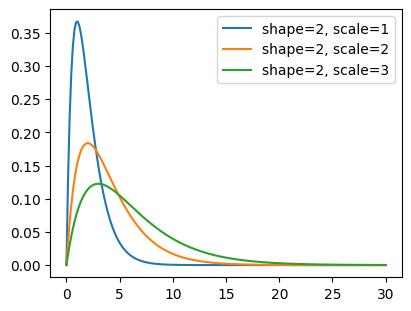

In [30]:
shape_list = [2, 2, 2]
scale_list = [1, 2, 3]
n_list = len(scale_list)

x = np.linspace(0, 30, 200)
y = [gamma_distribution(x, shape_list[i], scale_list[i]) for i in range(n_list)]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3), layout="constrained")
for i in range(n_list):
    sn.lineplot(x=x, y=y[i], label=f"shape={shape_list[i]}, scale={scale_list[i]}")    
ax.legend()


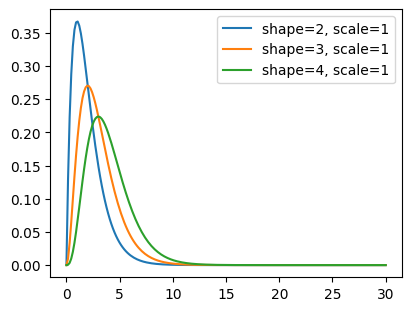

In [29]:
shape_list = [2, 3, 4]
scale_list = [1, 1, 1]
n_list = len(scale_list)

x = np.linspace(0, 30, 200)
y = [gamma_distribution(x, shape_list[i], scale_list[i]) for i in range(n_list)]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3), layout="constrained")
for i in range(n_list):
    sn.lineplot(x=x, y=y[i], label=f"shape={shape_list[i]}, scale={scale_list[i]}")    
ax.legend()


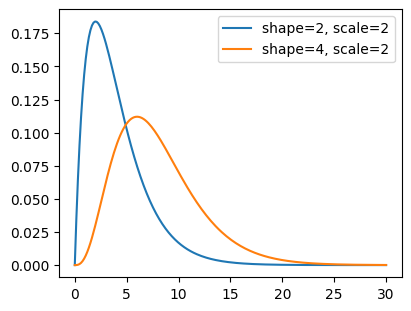

In [31]:
shape_list = [2, 4]
scale_list = [2, 2]
n_list = len(scale_list)

x = np.linspace(0, 30, 200)
y = [gamma_distribution(x, shape_list[i], scale_list[i]) for i in range(n_list)]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 3), layout="constrained")
for i in range(n_list):
    sn.lineplot(x=x, y=y[i], label=f"shape={shape_list[i]}, scale={scale_list[i]}")    
ax.legend()


In [51]:
def p_r(r, c, shape_list, scale_list, p_c_list):
    k = len(p_c_list)
    return np.sum([p_r_given_c(r, i, shape_list, scale_list)*p_c_list[i] for i in range(k)], axis=0)

def p_r_given_c(r, c, shape_list, scale_list):
    shape = shape_list[c]
    scale = scale_list[c]
    return gamma_distribution(r, shape, scale)

def p_c_given_r(r, c, shape_list, scale_list, p_c_list):
    return p_r_given_c(r, c, shape_list, scale_list)*p_c_list[c]/p_r(r, p_c_list, p_c_list)

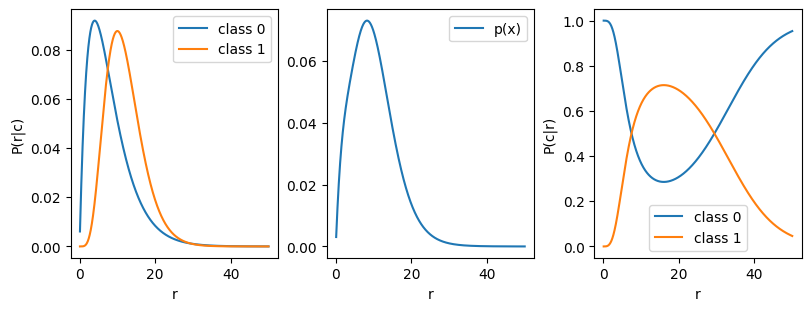

In [70]:
shape_list = [2, 6]
scale_list = [4, 2]
k = len(shape_list)
p_c_list = [1/len(shape_list)]*len(shape_list)
classes = [i for i in range(k)]

x = np.linspace(0.1, 50, 2000)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (8, 3), layout="constrained")
for i in range(len(classes)):
    y1 = p_r_given_c(x, classes[i], shape_list, scale_list)
    sn.lineplot(x=x, y=y1, label=f"class {classes[i]}", ax=axs[0])
    axs[0].set_ylabel(r"P(r|c)")
    
    y3 = p_c_given_r(x, classes[i], shape_list, scale_list, p_c_list)
    sn.lineplot(x=x, y=y3, label=f"class {classes[i]}", ax=axs[2])
    axs[2].set_ylabel(r"P(c|r)")
y2 = p_r(x, classes, p_c_list)
sn.lineplot(x=x, y=y2, label=f"p(x)", ax=axs[1])
for ax in axs:
    ax.legend()
    ax.set_xlabel("r")

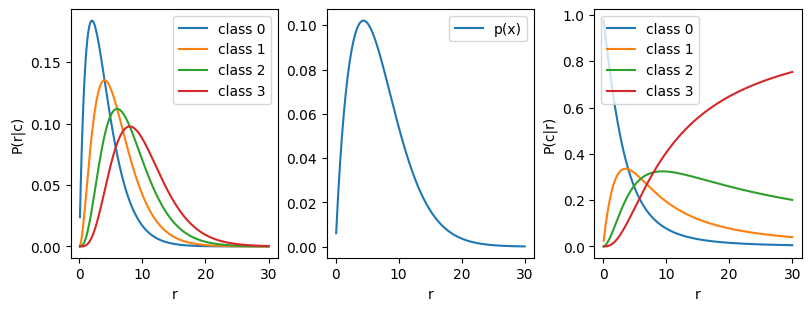

In [57]:
shape_list = [2, 3, 4, 5]
scale_list = [2, 2, 2, 2]
k = len(shape_list)
p_c_list = [1/len(shape_list)]*len(shape_list)
classes = [i for i in range(k)]

x = np.linspace(0.1, 30, 200)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (8, 3), layout="constrained")
for i in range(len(classes)):
    y1 = p_r_given_c(x, classes[i], shape_list, scale_list)
    sn.lineplot(x=x, y=y1, label=f"class {classes[i]}", ax=axs[0])
    axs[0].set_ylabel(r"P(r|c)")
    
    y3 = p_c_given_r(x, classes[i], shape_list, scale_list, p_c_list)
    sn.lineplot(x=x, y=y3, label=f"class {classes[i]}", ax=axs[2])
    axs[2].set_ylabel(r"P(c|r)")
y2 = p_r(x, classes, p_c_list)
sn.lineplot(x=x, y=y2, label=f"p(x)", ax=axs[1])
for ax in axs:
    ax.legend()
    ax.set_xlabel("r")